**Problem Statement**: A film distribution company wants to target audience based on their likes and dislikes, you as a Chief Data Scientist Analyze the data and come up with different rules of movie list so that the business objective is achieved.

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [2]:
movies= pd.read_csv(r"C:\Users\SALLA BHAVANA\Desktop\data science\Association Rules unsupervised\Datasets_Association Rules\my_movies.csv")

In [3]:
movies.columns

Index(['Sixth_Sense', 'Gladiator', 'LOTR1', 'Harry_Potter1', 'Patriot',
       'LOTR2', 'Harry_Potter2', 'LOTR', 'Braveheart', 'Green_Mile'],
      dtype='object')

In [4]:
movies.isnull().sum()

Sixth_Sense      0
Gladiator        0
LOTR1            0
Harry_Potter1    0
Patriot          0
LOTR2            0
Harry_Potter2    0
LOTR             0
Braveheart       0
Green_Mile       0
dtype: int64

In [6]:
frequent_itemsets = apriori(movies, min_support=0.0025, max_len=4 ,use_colnames = True)

In [7]:
frequent_itemsets

,support,itemsets
0,0.6,(Sixth_Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry_Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry_Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green_Mile)


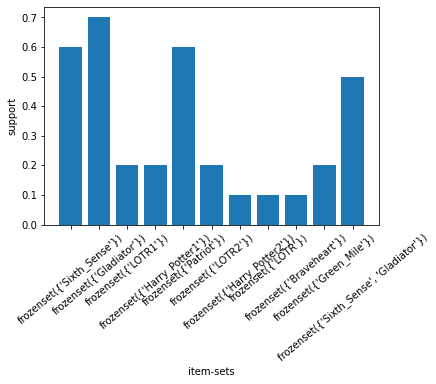

In [8]:
plt.bar(x = list(range(0, 11)), height = frequent_itemsets.support[0:11])
plt.xticks(list(range(0, 11)), frequent_itemsets.itemsets[0:11], rotation=40)
plt.xlabel('item-sets')
plt.ylabel('support')
plt.show()

In [9]:
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)

In [10]:
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth_Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth_Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Sixth_Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Patriot),(Sixth_Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(Sixth_Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
5,(LOTR),(Sixth_Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
6,(Sixth_Sense),(Green_Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.20
7,(Green_Mile),(Sixth_Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
8,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
9,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.80


In [11]:
rules.sort_values('lift', ascending =False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
156,"(Sixth_Sense, LOTR1)","(Harry_Potter1, Green_Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
131,"(Gladiator, Green_Mile)","(Sixth_Sense, LOTR)",0.1,0.1,0.1,1.0,10.0,0.09,inf
184,"(Sixth_Sense, LOTR2)","(Harry_Potter1, Green_Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
175,"(Green_Mile, LOTR2)","(Sixth_Sense, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
173,"(LOTR1, Green_Mile)","(Sixth_Sense, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
172,"(Sixth_Sense, LOTR2)","(LOTR1, Green_Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
170,"(Sixth_Sense, LOTR1)","(Green_Mile, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
124,"(Sixth_Sense, Gladiator, Green_Mile)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
130,"(Sixth_Sense, LOTR)","(Gladiator, Green_Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
161,"(Harry_Potter1, Green_Mile)","(Sixth_Sense, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [12]:
def to_list(i):
    return (sorted(list(i)))

In [13]:
ma_X = rules.antecedents.apply(to_list) + rules.consequents.apply(to_list)

In [14]:
ma_X = ma_X.apply(sorted)

In [15]:
rules_sets = list(ma_X)

In [16]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]

In [17]:
index_rules = []

In [18]:
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [19]:
rules_no_redudancy = rules.iloc[index_rules, :]

In [20]:
rules_no_redudancy.sort_values('lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
124,"(Sixth_Sense, Gladiator, Green_Mile)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
94,"(Gladiator, Green_Mile)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
180,"(Sixth_Sense, Green_Mile, LOTR2)",(Harry_Potter1),0.1,0.2,0.1,1.0,5.0,0.08,inf
16,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.0,0.16,inf
48,"(Sixth_Sense, LOTR1)",(Harry_Potter1),0.1,0.2,0.1,1.0,5.0,0.08,inf
22,(Harry_Potter1),(Harry_Potter2),0.2,0.1,0.1,0.5,5.0,0.08,1.8
118,"(Harry_Potter1, Green_Mile)",(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf
138,"(Sixth_Sense, LOTR1, LOTR2)",(Harry_Potter1),0.1,0.2,0.1,1.0,5.0,0.08,inf
194,"(LOTR1, Green_Mile, LOTR2)",(Harry_Potter1),0.1,0.2,0.1,1.0,5.0,0.08,inf
54,"(Sixth_Sense, LOTR1)",(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf
